In [1]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00


In [2]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
# Mount Google Drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv('/content/drive/MyDrive/world_marathon_majors.csv', encoding='cp1252')
data.tail()

,year,winner,gender,country,time,marathon
536,1978,Mark Stanforth,Male,United States,2018-05-04 02:19:20,Chicago
537,1978,Lynae Larson,Female,United States,2018-05-04 02:59:25,Chicago
538,1977,Dan Cloeter,Male,United States,2018-05-04 02:17:52,Chicago
539,1977,Dorothy Doolittle,Female,United States,2018-05-04 02:50:47,Chicago
540,2018,Vivian Cheruiyot,Female,Kenya,2018-05-04 02:18:31,London


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      541 non-null    int64 
 1   winner    536 non-null    object
 2   gender    536 non-null    object
 3   country   536 non-null    object
 4   time      536 non-null    object
 5   marathon  541 non-null    object
dtypes: int64(1), object(5)
memory usage: 25.5+ KB


In [6]:
data.columns

Index(['year', 'winner', 'gender', 'country', 'time', 'marathon'], dtype='object')

In [7]:
from datetime import datetime as dt

In [8]:
# Assuming 'data' is your DataFrame and 'time' is the column containing your datetime strings
data['time'] = pd.to_datetime(data['time'], format="%Y-%m-%d %H:%M:%S")

# Extract hours and minutes
data['hours'] = data['time'].dt.hour
data['minutes'] = data['time'].dt.minute

# Convert to seconds
data['finish_time_seconds'] = (data['hours'] * 3600) + (data['minutes'] * 60)

print(data['finish_time_seconds'])

0       7500.0
1       8340.0
2       7380.0
3       8340.0
4       7560.0
        ...   
536     8340.0
537    10740.0
538     8220.0
539    10200.0
540     8280.0
Name: finish_time_seconds, Length: 541, dtype: float64


In [9]:
data.describe()

,year,time,hours,minutes,finish_time_seconds
count,541.000000,536,536.000000,536.000000,536.000000
mean,1987.876155,2018-05-04 02:21:29.744402944,2.026119,19.434701,8460.111940
min,1897.000000,2018-05-04 02:02:57,2.000000,2.000000,7320.000000
25%,1980.000000,2018-05-04 02:09:43,2.000000,9.000000,7740.000000
50%,1993.000000,2018-05-04 02:21:07.500000,2.000000,20.000000,8460.000000
75%,2007.000000,2018-05-04 02:27:36.249999872,2.000000,26.000000,8820.000000
max,2018.000000,2018-05-04 03:30:00,3.000000,59.000000,12600.000000
std,26.198201,NaN,0.159639,11.438720,858.285613


In [10]:
winner_df=data.copy().drop(columns=['time', 'hours', 'minutes','winner'])
winner_df.head()

,year,gender,country,marathon,finish_time_seconds
0,2018,Male,Kenya,Tokyo,7500.0
1,2018,Female,Ethiopia,Tokyo,8340.0
2,2017,Male,Kenya,Tokyo,7380.0
3,2017,Female,Kenya,Tokyo,8340.0
4,2016,Male,Ethiopia,Tokyo,7560.0


In [11]:
gender_dummies=pd.get_dummies(winner_df['gender'], drop_first=True, dtype=int)
dummies = pd.get_dummies(winner_df, columns=['country', 'marathon'], dtype=int)


In [12]:
combined_df = pd.concat([ dummies, gender_dummies], axis=1)
combined_df.drop(columns=['gender'], inplace=True)
combined_df

,year,finish_time_seconds,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Colombia,country_Denmark,country_Eritrea,...,country_United Kingdom,country_United States,country_Yugoslavia,marathon_Berlin,marathon_Boston,marathon_Chicago,marathon_London,marathon_NYC,marathon_Tokyo,Male
0,2018,7500.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2018,8340.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017,7380.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2017,8340.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016,7560.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1978,8340.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
537,1978,10740.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
538,1977,8220.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
539,1977,10200.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [13]:
combined_df.columns

Index(['year', 'finish_time_seconds', 'country_Australia', 'country_Belgium',
       'country_Brazil', 'country_Canada', 'country_China', 'country_Colombia',
       'country_Denmark', 'country_Eritrea', 'country_Ethiopia',
       'country_Finland', 'country_Germany', 'country_Greece',
       'country_Guatemala', 'country_Hungary', 'country_Ireland',
       'country_Italy', 'country_Japan', 'country_Kenya', 'country_Latvia',
       'country_Mexico', 'country_Morocco', 'country_New Zealand',
       'country_Norway', 'country_Poland', 'country_Portugal',
       'country_Romania', 'country_Russia', 'country_South Africa',
       'country_South Korea', 'country_Soviet Union', 'country_Spain',
       'country_Sweden', 'country_Switzerland', 'country_Tanzania',
       'country_United Kingdom', 'country_United States', 'country_Yugoslavia',
       'marathon_Berlin', 'marathon_Boston', 'marathon_Chicago',
       'marathon_London', 'marathon_NYC', 'marathon_Tokyo', 'Male'],
      dtype='object')

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    541 non-null    int64  
 1   finish_time_seconds     536 non-null    float64
 2   country_Australia       541 non-null    int64  
 3   country_Belgium         541 non-null    int64  
 4   country_Brazil          541 non-null    int64  
 5   country_Canada          541 non-null    int64  
 6   country_China           541 non-null    int64  
 7   country_Colombia        541 non-null    int64  
 8   country_Denmark         541 non-null    int64  
 9   country_Eritrea         541 non-null    int64  
 10  country_Ethiopia        541 non-null    int64  
 11  country_Finland         541 non-null    int64  
 12  country_Germany         541 non-null    int64  
 13  country_Greece          541 non-null    int64  
 14  country_Guatemala       541 non-null    in

In [15]:
cleaned_df=combined_df.dropna()

In [16]:
cleaned_df

,year,finish_time_seconds,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Colombia,country_Denmark,country_Eritrea,...,country_United Kingdom,country_United States,country_Yugoslavia,marathon_Berlin,marathon_Boston,marathon_Chicago,marathon_London,marathon_NYC,marathon_Tokyo,Male
0,2018,7500.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,2018,8340.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017,7380.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2017,8340.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2016,7560.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1978,8340.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
537,1978,10740.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
538,1977,8220.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
539,1977,10200.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [17]:
y=cleaned_df['finish_time_seconds']
X=cleaned_df.drop(columns=['finish_time_seconds'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


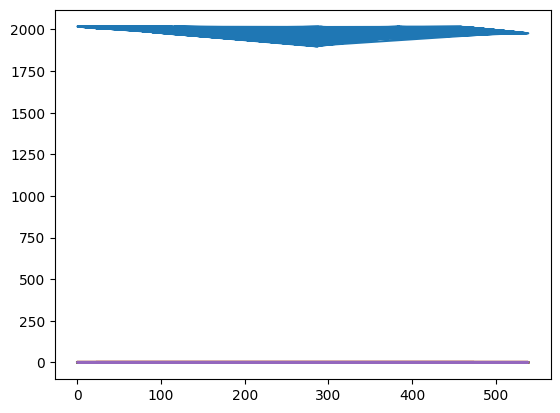

In [18]:
# Graph the data to help choose an activation function
import matplotlib.pyplot as plt

plt.plot(X_train)
plt.show()

In [19]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="linear", input_dim=45)) # Changed input_dim to 45
nn_model.add(tf.keras.layers.Dense(units=64, activation="linear"))
nn_model.add(tf.keras.layers.Dense(units=128, activation="linear"))
nn_model.add(tf.keras.layers.Dense(units=128, activation="linear"))
nn_model.add(tf.keras.layers.Dense(units=64, activation="linear"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=50)
predicted = nn_model.predict(X_test)
predicted

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0000e+00 - loss: 40944056.0000 
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 4094029.7500 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1330994.8750 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 756273.3125 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 840492.1250  
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 886588.3125  
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 709441.9375 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 684052.2500 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 841541.6250 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 777378.5000 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

array([[8721.776 ],
       [8719.951 ],
       [8640.55  ],
       [8579.024 ],
       [8687.553 ],
       [8652.462 ],
       [8727.876 ],
       [8742.725 ],
       [8697.764 ],
       [8566.338 ],
       [8647.855 ],
       [8520.27  ],
       [8567.381 ],
       [8557.667 ],
       [8578.833 ],
       [8603.897 ],
       [8570.674 ],
       [8610.117 ],
       [8653.899 ],
       [8400.2295],
       [8497.341 ],
       [8443.583 ],
       [8544.661 ],
       [8702.723 ],
       [8712.528 ],
       [8246.082 ],
       [8432.504 ],
       [8593.364 ],
       [8749.654 ],
       [8382.888 ],
       [8237.412 ],
       [8715.105 ],
       [8698.731 ],
       [8687.37  ],
       [8663.081 ],
       [8489.694 ],
       [8706.317 ],
       [8677.64  ],
       [8698.501 ],
       [8604.239 ],
       [8655.772 ],
       [8515.934 ],
       [8589.3545],
       [8683.903 ],
       [8597.54  ],
       [8651.833 ],
       [8656.907 ],
       [8682.758 ],
       [8356.876 ],
       [8747.915 ],


In [20]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,933 (409.90 KB)

 Trainable params: 34,977 (136.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,956 (273.27 KB)

In [21]:
nn_model.save('marathon_winners.h5')

In [22]:
from sklearn.linear_model import LogisticRegression, LinearRegression


# Define the logistic regression model
log_classifier = LinearRegression()

# Train the model
log_classifier.fit(X_train,y_train)

#from sklearn.metrics import accuracy_score
y_pred = log_classifier.predict(X_test)
#print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")
print(y_pred)


[7446.11295631 8657.90143526 7772.05869031 8424.93608789 7689.60347547
 8930.44269626 8553.11164132 7756.44211277 7461.39038493 9739.57084678
 8738.01469486 8382.53390727 9701.33825268 9776.76698201 8394.27525556
 9192.31296426 9720.97277917 8653.07340082 9298.71606813 9225.68945405
 8362.31733135 9039.70877794 9832.56118484 8962.49027026 8697.69280943
 9413.3243524  8613.60744512 7882.38074024 7165.49132627 9300.0817245
 9450.52048763 7386.99811448 7673.04604454 8740.38778866 7610.17492582
 8427.83720958 8709.99604463 8805.64951727 7540.40306208 7597.28514447
 8867.979023   8401.13197488 8121.4368745  7586.0780142  9540.49094707
 8958.06575598 8736.33196886 7613.49556481 9411.67013016 7668.95061873
 7802.82507236 8753.5733559  8739.47527572 7532.59618392 9653.44500911
 9727.83727955 8388.77641155 9486.06240061 9407.82619393 8382.96868424
 8797.81967857 8619.66884115 7901.2087047  8695.09757049 9709.23921194
 7854.9617264  9631.00300526 7827.85289314 8927.93572743 9448.86626539
 7344.3

# New Section

##Optimization


In [23]:
cleaned_df.nunique()

,0
year,121
finish_time_seconds,63
country_Australia,2
country_Belgium,2
country_Brazil,2
country_Canada,2
country_China,2
country_Colombia,2
country_Denmark,2
country_Eritrea,2


In [24]:
# Ensure the 'year' column is numeric
#cleaned_df['year'] = pd.to_numeric(cleaned_df['year'], errors='coerce')

# Identify years to replace (those before 1972)
years_to_replace = cleaned_df[cleaned_df['year'] < 1972]['year'].unique()

# Replace in dataframe
for year in years_to_replace:
    cleaned_df['year'] = cleaned_df['year'].replace(year, "Other")

# Check to make sure binning was successful
print(cleaned_df['year'].value_counts())

year
Other    82
2014     13
2011     12
2017     12
2008     12
2009     12
2010     12
2007     12
2013     12
2015     12
2016     12
1981     11
1982     10
1983     10
1984     10
1985     10
1986     10
1988     10
1989     10
1990     10
1991     10
1992     10
1993     10
1994     10
1995     10
2002     10
2012     10
1996     10
2005     10
2004     10
2003     10
2006     10
2001     10
2000     10
1999     10
1998     10
1997     10
1987      8
1980      8
1979      8
1978      8
1977      8
1976      6
1975      6
1974      6
2018      6
1973      4
1972      4
Name: count, dtype: int64


<ipython-input-24-d0c28056d50c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['year'] = cleaned_df['year'].replace(year, "Other")


In [25]:
# Convert the 'year' column to integer, coercing errors to NaN
cleaned_df['year'] = pd.to_numeric(cleaned_df['year'], errors='coerce').fillna(0).astype(int)

<ipython-input-25-1a3b58a20424>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['year'] = pd.to_numeric(cleaned_df['year'], errors='coerce').fillna(0).astype(int)


In [26]:
# Assuming cleaned_df is already defined and contains the 'year' column
bins = [0, 1970, 1980, 1990, 2000, 2010, 2020, float('inf')]
labels = ['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', 'Other']

# Create a new column 'decade' based on the 'year' column
cleaned_df['decade'] = pd.cut(cleaned_df['year'], bins=bins, labels=labels, right=False)

# Check the result
print(cleaned_df[['year', 'decade']].head())

   year decade
0  2018  2020s
1  2018  2020s
2  2017  2020s
3  2017  2020s
4  2016  2020s


<ipython-input-26-1c80a02089ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['decade'] = pd.cut(cleaned_df['year'], bins=bins, labels=labels, right=False)


In [27]:
cleaned_df.drop('year', axis=1, inplace=True)

<ipython-input-27-f38a5a6c3748>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop('year', axis=1, inplace=True)


In [28]:
cleaned_df.head()


,finish_time_seconds,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Colombia,country_Denmark,country_Eritrea,country_Ethiopia,...,country_United States,country_Yugoslavia,marathon_Berlin,marathon_Boston,marathon_Chicago,marathon_London,marathon_NYC,marathon_Tokyo,Male,decade
0,7500.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2020s
1,8340.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2020s
2,7380.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2020s
3,8340.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2020s
4,7560.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,2020s


In [29]:
cleaned_df=pd.get_dummies(cleaned_df, columns=['decade'], dtype=int)


In [30]:
cleaned_df=cleaned_df.drop(columns=['decade_Other'])
cleaned_df.head()

,finish_time_seconds,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Colombia,country_Denmark,country_Eritrea,country_Ethiopia,...,marathon_London,marathon_NYC,marathon_Tokyo,Male,decade_1970s,decade_1980s,decade_1990s,decade_2000s,decade_2010s,decade_2020s
0,7500.0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,8340.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,7380.0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,8340.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,7560.0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,1


In [31]:
y=cleaned_df['finish_time_seconds']
X=cleaned_df.drop(columns=['finish_time_seconds'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

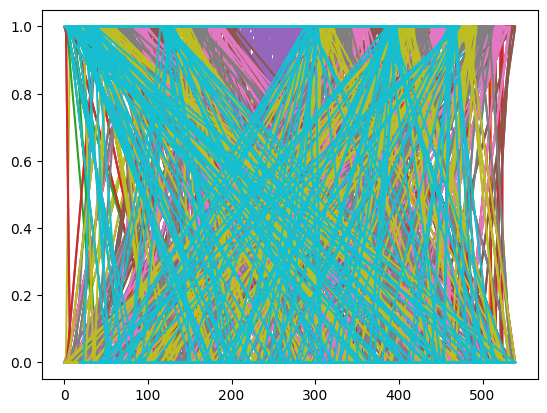

In [32]:
# Graph the data to help choose an activation function
import matplotlib.pyplot as plt

plt.plot(X_train)
plt.show()

In [33]:
# Define the deep learning model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="linear", input_dim=50)) # Changed input_dim to 45
nn_model.add(tf.keras.layers.Dense(units=64, activation="linear"))
nn_model.add(tf.keras.layers.Dense(units=128, activation="linear"))
nn_model.add(tf.keras.layers.Dense(units=128, activation="linear"))
nn_model.add(tf.keras.layers.Dense(units=64, activation="linear"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train, y_train, epochs=50)
predicted = nn_model.predict(X_test)
predicted

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0000e+00 - loss: 71237072.0000
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 71414456.0000 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 69510304.0000 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 57225676.0000 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 23238104.0000 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 8860379.0000 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 4913236.0000
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 3955199.0000 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 3572386.5000 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 2629723.5000 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accu

array([[ 7617.86  ],
       [ 8705.26  ],
       [ 7677.9946],
       [ 8763.069 ],
       [ 7725.4873],
       [ 9007.3   ],
       [ 8672.686 ],
       [ 7886.1743],
       [ 7581.6978],
       [ 9929.414 ],
       [ 8879.957 ],
       [ 9441.307 ],
       [ 9927.397 ],
       [10527.755 ],
       [ 8796.295 ],
       [ 7974.627 ],
       [ 9929.414 ],
       [ 8717.716 ],
       [ 9218.775 ],
       [ 9363.426 ],
       [ 8733.3   ],
       [ 9363.426 ],
       [10527.755 ],
       [ 8956.229 ],
       [ 8804.645 ],
       [ 9030.48  ],
       [ 9030.48  ],
       [ 7858.937 ],
       [ 7341.309 ],
       [ 9363.426 ],
       [ 9030.4795],
       [ 7572.1416],
       [ 4632.6626],
       [ 8835.854 ],
       [ 7581.6978],
       [ 7503.4126],
       [ 8616.793 ],
       [ 8712.801 ],
       [ 7563.634 ],
       [ 7439.564 ],
       [ 8873.532 ],
       [ 9441.307 ],
       [ 7149.2114],
       [ 7550.488 ],
       [ 9283.798 ],
       [ 8932.152 ],
       [ 8738.492 ],
       [ 7627

In [34]:
import plotly.graph_objects as go
# Assuming 'predicted' is your data for the y-axis
fig = go.Figure()

# Add a trace
fig.add_trace(go.Scatter(
    y=predicted,
    hoverinfo='text',
    text=[f'Index: {i}, Value: {val}' for i, val in enumerate(predicted)]
))

# Show the plot
fig.show()


##Automatic Optimization

In [35]:
!pip install keras-tuner

In [36]:
# Created method to create a Sequential model with hyperparameter options.
def create_model(hp):
    nn = tf.keras.models.Sequential()
    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid','linear'])

    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                              min_value=0,
                                              max_value=10,
                                              step=2), activation=activation, input_dim=(X_train.shape[1])))
    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        # Remove input_dim or set it dynamically based on the previous layer's output shape
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=0,
                                                  max_value=10,
                                                  step=2),
                                      activation=activation)) # No input_dim here

    nn.add(tf.keras.layers.Dense(units=1, activation=activation))

    # Compile the model
    nn.compile(loss="mean_squared_error", optimizer='adam', metrics=["accuracy"])

    return nn



In [37]:
# Created method to create a Sequential model with hyperparameter options.
def create_model(hp):
    nn = tf.keras.models.Sequential()
    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid','linear'])

    activation_outter = hp.Choice('activation_outter', ['relu', 'tanh', 'sigmoid','linear'])

    # Allow kerastuner to decide number of neurons in first layer
    nn.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                              min_value=0,
                                              max_value=10,
                                              step=2), activation=activation, input_dim=(X_train.shape[1])))
    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        # Remove input_dim or set it dynamically based on the previous layer's output shape
        nn.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
                                                  min_value=0,
                                                  max_value=10,
                                                  step=2),
                                      activation=activation)) # No input_dim here

    nn.add(tf.keras.layers.Dense(units=1, activation=activation_outter))

    # Compile the model
    nn.compile(loss="mean_squared_error", optimizer='adam', metrics=["accuracy"])

    return nn

In [38]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [39]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Trial 60 Complete [00h 00m 06s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 04m 44s


In [40]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'activation_outter': 'sigmoid',
 'first_units': 8,
 'num_layers': 5,
 'units_0': 6,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0,
 'units_1': 0,
 'units_2': 0,
 'units_3': 0,
 'units_4': 0}

In [41]:
# Evaluate the model using the test data
best_model=tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 



5/5 - 1s - 220ms/step - accuracy: 0.0000e+00 - loss: 74712312.0000
Loss: 74712312.0, Accuracy: 0.0


In [42]:
# Export our model to HDF5 file
best_model.save('AlphabetSoupCharity_Optimization.h5')

In [43]:
opt_predictions = best_model.predict(X_test)
opt_predictions

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.50324863],
       [0.503

In [44]:
X_test.head()

,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Colombia,country_Denmark,country_Eritrea,country_Ethiopia,country_Finland,...,marathon_London,marathon_NYC,marathon_Tokyo,Male,decade_1970s,decade_1980s,decade_1990s,decade_2000s,decade_2010s,decade_2020s
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
366,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
310,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [45]:
chicago_df = cleaned_df[cleaned_df['marathon_Chicago'] == 1]
chicago_df.head()

,finish_time_seconds,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Colombia,country_Denmark,country_Eritrea,country_Ethiopia,...,marathon_London,marathon_NYC,marathon_Tokyo,Male,decade_1970s,decade_1980s,decade_1990s,decade_2000s,decade_2010s,decade_2020s
458,7740.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
459,8280.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
460,7860.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
461,8460.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
462,7740.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [46]:
X_Chi=chicago_df.drop(columns=['finish_time_seconds'])

chicago_predictions = nn_model.predict(X_Chi)
chicago_predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[7917.3843],
       [8672.686 ],
       [7572.1416],
       [8736.471 ],
       [7572.1416],
       [8736.471 ],
       [7572.1416],
       [8672.686 ],
       [7572.1416],
       [8736.471 ],
       [7508.3584],
       [8672.686 ],
       [7572.1416],
       [8672.686 ],
       [7572.1416],
       [8672.686 ],
       [7581.6978],
       [9171.471 ],
       [7581.6978],
       [8835.854 ],
       [7581.6978],
       [8682.242 ],
       [7581.6978],
       [8682.242 ],
       [7581.6978],
       [9091.269 ],
       [7581.6978],
       [8872.767 ],
       [7581.6978],
       [8835.854 ],
       [7926.941 ],
       [8887.491 ],
       [7581.6978],
       [8746.026 ],
       [7926.941 ],
       [8746.026 ],
       [7734.46  ],
       [8873.532 ],
       [7709.2046],
       [8873.532 ],
       [7734.46  ],
       [9014.998 ],
       [7850.6694],
       [9014.998 ],
       [7850.6694],
       [8588.649 ],
       [7886.2197],
       [9218.775 ],
       [7886.2197],
       [8588.649 ],


In [47]:
chicago_times = X_Chi.copy()
chicago_times["predicted_time_seconds"] = chicago_predictions
chicago_times

,country_Australia,country_Belgium,country_Brazil,country_Canada,country_China,country_Colombia,country_Denmark,country_Eritrea,country_Ethiopia,country_Finland,...,marathon_NYC,marathon_Tokyo,Male,decade_1970s,decade_1980s,decade_1990s,decade_2000s,decade_2010s,decade_2020s,predicted_time_seconds
458,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,7917.384277
459,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,8672.685547
460,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,7572.141602
461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8736.470703
462,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,7572.141602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9960.623047
536,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,8796.294922
537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9960.623047
538,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,8796.294922


In [48]:
chicago_comparison = chicago_df.copy()
chicago_comparison["predicted_time_seconds"] = chicago_predictions
chicago_comparison[["predicted_time_seconds","finish_time_seconds"]]

,predicted_time_seconds,finish_time_seconds
458,7917.384277,7740.0
459,8672.685547,8280.0
460,7572.141602,7860.0
461,8736.470703,8460.0
462,7572.141602,7740.0
...,...,...
535,9960.623047,11700.0
536,8796.294922,8340.0
537,9960.623047,10740.0
538,8796.294922,8220.0


In [49]:
chicago_comparison.to_csv("chicago_comparison_index.csv", index=True)

In [51]:
# List of marathon events you want to filter by
marathon_events = ['marathon_Chicago', 'marathon_NYC', 'marathon_Boston', 'marathon_Berlin', 'marathon_Tokyo', 'marathon_London']

for event in marathon_events:
    # Filter the DataFrame for the specific marathon event
    event_df = cleaned_df[cleaned_df[event] == 1]

    # Drop the finish time column
    X_event = event_df.drop(columns=['finish_time_seconds'])

    # Make predictions
    event_predictions = nn_model.predict(X_event)

    # Create a copy of the DataFrame and add predictions
    event_times = X_event.copy()
    event_times["predicted_time_seconds"] = event_predictions

    # Create a comparison DataFrame
    event_comparison = event_df.copy()
    event_comparison["predicted_time_seconds"] = event_predictions

    # Save the comparison DataFrame to a CSV file
    event_comparison.to_csv(f"{event}_comparison_index.csv", index=True)

    # You can print or store the results as needed
    print(f"Predictions for {event}:")
    print(event_comparison.head())

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Predictions for marathon_Chicago:
     finish_time_seconds  country_Australia  country_Belgium  country_Brazil  \
458               7740.0                  0                0               0   
459               8280.0                  0                0               0   
460               7860.0                  0                0               0   
461               8460.0                  0                0               0   
462               7740.0                  0                0               0   

     country_Canada  country_China  country_Colombia  country_Denmark  \
458               0              0                 0                0   
459               0              0                 0                0   
460               0              0                 0                0   
461               0              0                 0                0   
462               0              0                 0                0   

     co